In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_excel(r"C:\Users\yelkindiyebiri\Desktop\bootcampp\LungCancerRiskData.xlsx", header=0) # ( use r before print data and here header 0 means the 0th is our column

In [3]:
#data['Level']=data['Level'].map({'Low':0, 'Medium':0.5,'High':1}) 
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       Occupational Hazards  Genetic Risk  Chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [4]:
data["Level"].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

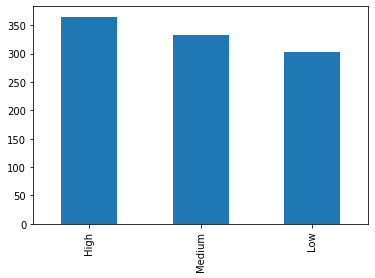

In [5]:
data["Level"].value_counts().plot.bar();

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
Occupational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
Chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [7]:
data.drop("Patient ID", axis=1, inplace=True)

In [8]:
data.head()

,Level,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,Low,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,Medium,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,High,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,High,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,High,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


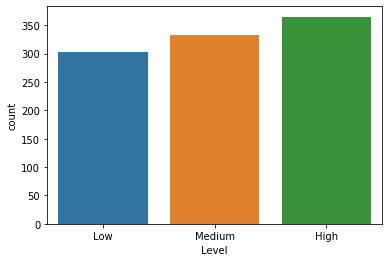

In [9]:
sns.countplot(data['Level'],label="Count")

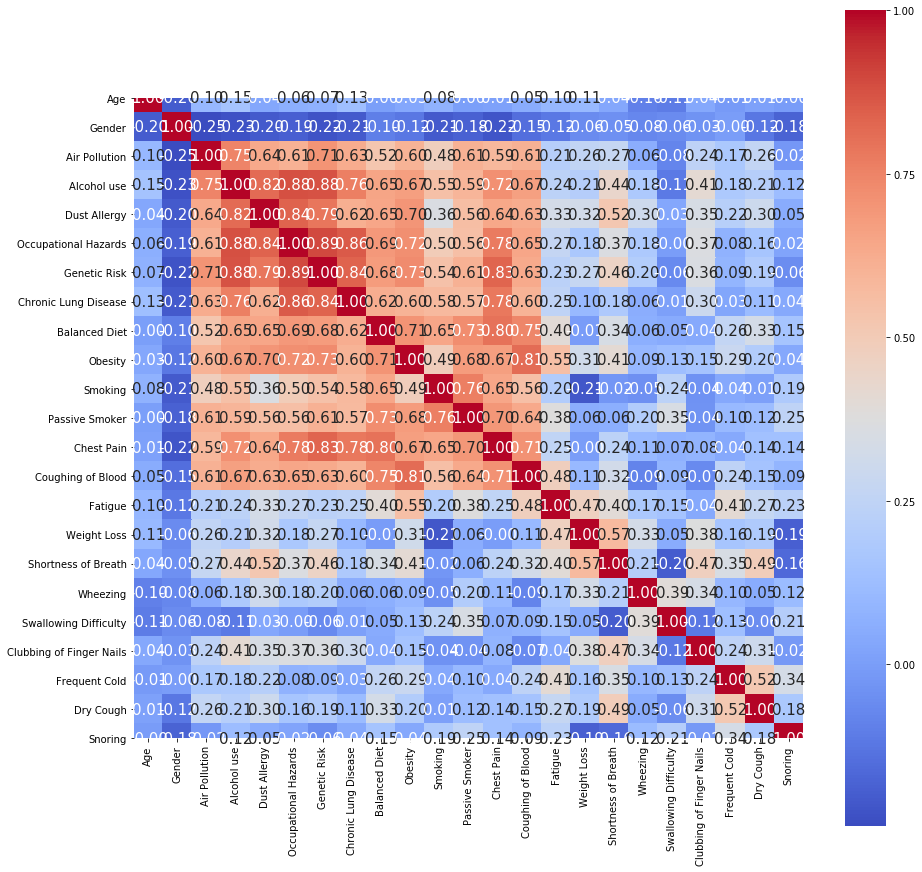

In [10]:
features = list(data.columns[1:24])
corr = data[features].corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features,
           cmap= 'coolwarm')

In [11]:
data.shape

(1000, 24)

In [12]:
y = data["Level"]
X = data.drop(['Level'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
541,28,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
440,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
482,32,1,2,3,6,7,7,7,7,2,...,4,2,1,3,2,2,1,2,5,1
422,45,1,6,7,7,7,7,6,7,7,...,7,4,4,5,6,5,5,4,6,5
778,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=4, min_samples_split=200,  n_estimators=100).fit(X_train, y_train)

In [16]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9366666666666666

In [18]:
y_test

521    Medium
737    Medium
740    Medium
660      High
411    Medium
        ...  
468       Low
935       Low
428      High
7         Low
155       Low
Name: Level, Length: 300, dtype: object

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.87      0.98      0.92       119
         Low       1.00      0.95      0.98        84
      Medium       0.98      0.87      0.92        97

    accuracy                           0.94       300
   macro avg       0.95      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



In [20]:
data.head()

,Level,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,Low,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,Medium,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,High,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,High,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,High,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
Level                       1000 non-null object
Age                         1000 non-null int64
Gender                      1000 non-null int64
Air Pollution               1000 non-null int64
Alcohol use                 1000 non-null int64
Dust Allergy                1000 non-null int64
Occupational Hazards        1000 non-null int64
Genetic Risk                1000 non-null int64
Chronic Lung Disease        1000 non-null int64
Balanced Diet               1000 non-null int64
Obesity                     1000 non-null int64
Smoking                     1000 non-null int64
Passive Smoker              1000 non-null int64
Chest Pain                  1000 non-null int64
Coughing of Blood           1000 non-null int64
Fatigue                     1000 non-null int64
Weight Loss                 1000 non-null int64
Shortness of Breath         1000 non-null int64
Wheezing                    1

In [22]:
y = data["Level"]
X = data.drop(["Level"], axis=1)

In [65]:
loj  = sm.Logit(y_train,X_train)  #X_train, X_test, y_train, y_test
loj_model = loj.fit()
loj_model.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [23]:
np.asarray(data)

array([['Low', 33, 1, ..., 2, 3, 4],
       ['Medium', 17, 1, ..., 1, 7, 2],
       ['High', 35, 1, ..., 6, 7, 2],
       ...,
       ['High', 25, 2, ..., 6, 7, 2],
       ['High', 18, 2, ..., 4, 2, 3],
       ['High', 47, 1, ..., 6, 7, 2]], dtype=object)

In [24]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_test,y_test)  #X_train, X_test, y_train, y_test
loj_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
loj_model.intercept_

array([-0.98700465,  2.90025715, -2.27658189])

In [26]:
loj_model.coef_

array([[-0.25132278, -1.28285124,  0.68469258,  1.64999147, -1.13188522,
        -1.01625414,  0.12762733, -0.07978162,  0.20846052,  0.83973984,
         0.05203067,  1.14851148, -0.29891272,  0.40085536,  1.06361278,
         0.14063566,  0.26831786, -0.58534523,  0.08354922, -0.66951331,
        -0.47727292,  0.40771318, -0.7002182 ],
       [ 0.07593688,  2.5159445 ,  0.2890161 , -0.62560857, -0.17341809,
         0.98072374, -1.30787856,  0.39261451,  0.18478866, -0.85988248,
         0.61806301, -0.41713462,  0.13139825,  0.01705964, -1.79749503,
         0.84540479, -0.27117764,  0.02605523, -0.5329087 , -0.93358277,
        -0.07860745,  0.25765428,  0.14611658],
       [ 0.05547032, -1.38092504, -1.15608431, -0.55559026,  1.19196624,
        -0.44103822,  0.84251489, -0.23473005, -0.31758591,  0.50257302,
        -0.43228655, -0.4212575 , -0.01443917,  0.0170163 , -0.34502148,
         0.09129786, -0.14590917,  0.58401536, -0.08175657,  0.46440649,
         0.21619829, -0.4550

In [27]:
y_pred = loj_model.predict(X_test)  #X_train, X_test, y_train, y_test

In [28]:
confusion_matrix(y_test, y_pred)

array([[119,   0,   0],
       [  0,  80,   4],
       [  1,   2,  94]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pred)

0.9766666666666667

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      1.00      1.00       119
         Low       0.98      0.95      0.96        84
      Medium       0.96      0.97      0.96        97

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



In [31]:
loj_model.predict(X)[10:20]

array(['High', 'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High',
       'High', 'Medium'], dtype=object)

In [32]:
y[10:20]

10      High
11      High
12    Medium
13      High
14       Low
15    Medium
16    Medium
17      High
18      High
19    Medium
Name: Level, dtype: object

In [33]:
#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(X_train,y_train)
print("random forest algo result: ",rf.score(X_test,y_test))

random forest algo result:  1.0


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("score: ", dt.score(X_test,y_test))

score:  1.0


In [102]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction = model.predict(X_train)
metrics.accuracy_score(prediction,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [700, 300]